## SVM using OVO

First, we read the combined dataset and split it into train and test datasets. Then we stratify the train and test datasets to obtain a balanced dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_data.csv')
df.head()

,sentiment,Text
0,sadness,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,happy,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


Remove Stopwords:

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stopWords = stopwords.words("english")

def cleanText(text):
    
    output = ""
    
    
    for word in text.split():
        cleanWord = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(word))
        if cleanWord in stopWords:
            pass
        else:
            output = output + " " + cleanWord
    return output

In [4]:
df.Text = df.Text.apply(lambda x: cleanText(x))

In [5]:
import re
df['Text'] = df['Text'].apply(lambda x: re.sub("(@[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)",'',x))
df.dropna(inplace=True)

Apply a snowball stemmer

In [6]:
import snowballstemmer
ss = snowballstemmer.stemmer('english')
def replace(x):
    words = x.split()
    newtext = ''
    for w in words:
        n = ss.stemWord(w)
        newtext += n
        newtext += " "
    return newtext
df['Text'] = df['Text'].apply(lambda x: replace(x))
df.head()

,sentiment,Text
0,sadness,tiffanylu know listenin bad habit earlier star...
1,sadness,Layin n bed headach ughhhh waitin call
2,sadness,Funer ceremoni gloomi friday
3,happy,want hang friend SOON
4,neutral,dannycastillo We want trade someon Houston tic...


Stratify:

In [7]:
def stratify(data, N):
    rows = []
    fear = data[data['sentiment'] == 'fear']
    happy = data[data['sentiment'] == 'happy']
    sad = data[data['sentiment'] == 'sadness']
    neutral = data[data['sentiment'] == 'neutral']
    love = data[data['sentiment'] == 'love']
    anger = data[data['sentiment'] == 'anger']
    surprise = data[data['sentiment'] == 'surprise']
    relief = data[data['sentiment'] == 'relief']
    
    for i in range(N):
        #print(fear.loc[np.random.choice(fear.index)])
        rows.append(fear.loc[np.random.choice(fear.index)])
        rows.append(happy.loc[np.random.choice(happy.index)])
        rows.append(sad.loc[np.random.choice(sad.index)])
        rows.append(neutral.loc[np.random.choice(neutral.index)])
        rows.append(love.loc[np.random.choice(love.index)])
        rows.append(anger.loc[np.random.choice(anger.index)])
        rows.append(surprise.loc[np.random.choice(surprise.index)])
        rows.append(relief.loc[np.random.choice(relief.index)])
    sentiments = [x['sentiment'] for x in rows]
    texts = [x['Text'] for x in rows]
    d = {'sentiment': sentiments, 'Text': texts}
    return pd.DataFrame(d)

Split into train and test

In [8]:
from sklearn.model_selection import train_test_split
import time
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
Balanced_Train, Balanced_Test = train_test_split(df, test_size=0.2, random_state=42)

Stratify Train

In [9]:
balanced_df_train = stratify(Balanced_Train, 8000)
balanced_df_train['sentiment'].value_counts()

sadness     8000
fear        8000
surprise    8000
neutral     8000
love        8000
happy       8000
relief      8000
anger       8000
Name: sentiment, dtype: int64

Stratify Test

In [10]:
balanced_df_test = stratify(Balanced_Test, 2000)
balanced_df_test['sentiment'].value_counts()

relief      2000
surprise    2000
neutral     2000
love        2000
anger       2000
sadness     2000
fear        2000
happy       2000
Name: sentiment, dtype: int64

Unbalanced Data

In [11]:
unbalanced = pd.read_csv('combined_data.csv')
unbalanced.head()

,sentiment,Text
0,sadness,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,happy,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stopWords = stopwords.words("english")

def cleanText(text):
    
    output = ""
    
    
    for word in text.split():
        cleanWord = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(word))
        if cleanWord in stopWords:
            pass
        else:
            output = output + " " + cleanWord
    return output

In [13]:
unbalanced.Text = unbalanced.Text.apply(lambda x: cleanText(x))

In [14]:
import re
unbalanced['Text'] = unbalanced['Text'].apply(lambda x: re.sub("(@[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)",'',x))
unbalanced.dropna(inplace=True)

In [15]:
import snowballstemmer
ss = snowballstemmer.stemmer('english')
def replace(x):
    words = x.split()
    newtext = ''
    for w in words:
        n = ss.stemWord(w)
        newtext += n
        newtext += " "
    return newtext
unbalanced['Text'] = unbalanced['Text'].apply(lambda x: replace(x))
unbalanced.head()

,sentiment,Text
0,sadness,tiffanylu know listenin bad habit earlier star...
1,sadness,Layin n bed headach ughhhh waitin call
2,sadness,Funer ceremoni gloomi friday
3,happy,want hang friend SOON
4,neutral,dannycastillo We want trade someon Houston tic...


In [16]:
unbalanced['sentiment'].value_counts()

fear        16241
happy       13508
sadness      9796
neutral      8960
love         4720
anger        4069
surprise     2639
relief       1526
Name: sentiment, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

#overall train and test
Unbalanced_train, Unbalanced_test = train_test_split(unbalanced, test_size=0.2, random_state=42)

Unbalanced Train and Test

In [18]:
for i,s in enumerate(unbalanced['sentiment']):
    if s == 'happy':
        unbalanced.loc[i,'sentiment'] = '1'
    if s == 'fear':
        unbalanced.loc[i,'sentiment'] = '2'
    if s == 'sadness':
        unbalanced.loc[i,'sentiment'] = '3'
    if s == 'neutral':
        unbalanced.loc[i,'sentiment'] = '4'
    if s == 'love':
        unbalanced.loc[i,'sentiment'] = '5'
    if s == 'anger':
        unbalanced.loc[i,'sentiment'] = '6'
    if s == 'surprise':
        unbalanced.loc[i,'sentiment'] = '7'
    if s == 'relief':
        unbalanced.loc[i,'sentiment'] = '8'
        

from sklearn.preprocessing import StandardScaler

unbalanced_train, unbalanced_test = train_test_split(unbalanced, test_size=0.2, random_state=42)

vectorizer_untrainuntest = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors_ovo_untrainuntest = vectorizer_untrainuntest.fit_transform(unbalanced_train['Text'])
test_vectors_ovo_untrainuntest = vectorizer_untrainuntest.transform(unbalanced_test['Text'])

classifier_ovo_untrainuntest = svm.SVC(decision_function_shape='ovo')
t0 = time.time()
classifier_ovo_untrainuntest.fit(train_vectors_ovo_untrainuntest, unbalanced_train['sentiment'])
t1 = time.time()
#svm.SVC(decision_function_shape='ovo')
prediction_ovo_untrainuntest = classifier_ovo_untrainuntest.predict(test_vectors_ovo_untrainuntest)
t2 = time.time()
time_ovo_train = t1-t0
time_ovo_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_ovo_train, time_ovo_predict))
report = classification_report(unbalanced_test['sentiment'], prediction_ovo_untrainuntest, output_dict=True)
print('happy: ', report['1'])
print('fear: ', report['2'])
print('sadness: ', report['3'])
print('neutral: ', report['4'])
print('love: ', report['5'])
print('anger: ', report['6'])
print('surprise: ', report['7'])
print('relief: ', report['8'])

Training time: 757.262862s; Prediction time: 49.833889s
happy:  {'precision': 0.440261356565028, 'recall': 0.514171511627907, 'f1-score': 0.47435467650016755, 'support': 2752}
fear:  {'precision': 0.3882760112481073, 'recall': 0.5489296636085627, 'f1-score': 0.4548333966806031, 'support': 3270}
sadness:  {'precision': 0.46486028789161726, 'recall': 0.28197226502311246, 'f1-score': 0.3510230179028133, 'support': 1947}
neutral:  {'precision': 0.35406091370558374, 'recall': 0.4761092150170648, 'f1-score': 0.4061135371179039, 'support': 1758}
love:  {'precision': 0.5133779264214047, 'recall': 0.3184647302904564, 'f1-score': 0.39308578745198464, 'support': 964}
anger:  {'precision': 0.4946236559139785, 'recall': 0.17534942820838628, 'f1-score': 0.2589118198874297, 'support': 787}
surprise:  {'precision': 0.4074074074074074, 'recall': 0.021739130434782608, 'f1-score': 0.04127579737335835, 'support': 506}
relief:  {'precision': 0.5, 'recall': 0.00974025974025974, 'f1-score': 0.019108280254777

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Unbalanced training model tested on unbalanced test data:')
print('Accuracy score: {}'.format(accuracy_score(unbalanced_test['sentiment'], prediction_ovo_untrainuntest)))
print('precision score: {}'.format(precision_score(unbalanced_test['sentiment'], prediction_ovo_untrainuntest, average='macro')))
print('recall score: {}'.format(recall_score(unbalanced_test['sentiment'], prediction_ovo_untrainuntest,average='macro')))
print('f1 score: {}'.format(f1_score(unbalanced_test['sentiment'], prediction_ovo_untrainuntest,average='macro')))
print()

Unbalanced training model tested on unbalanced test data:
Accuracy score: 0.4112430849332899
precision score: 0.4453584448941409
recall score: 0.2933095254938165
f1 score: 0.2998382891461297



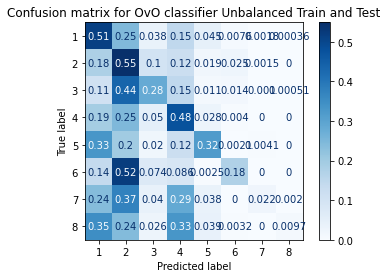

In [36]:
#Unbalanced
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix = plot_confusion_matrix(classifier_ovo_untrainuntest, test_vectors_ovo_untrainuntest, unbalanced_test['sentiment'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvO classifier Unbalanced Train and Test')
plt.show(matrix)
plt.show()

Balanced Train and Test

In [20]:
#Balanced
from sklearn.model_selection import train_test_split
import time
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
for i,s in enumerate(balanced_df_train['sentiment']):
    if s == 'happy':
        balanced_df_train.loc[i,'sentiment'] = '1'
    if s == 'fear':
        balanced_df_train.loc[i,'sentiment'] = '2'
    if s == 'sadness':
        balanced_df_train.loc[i,'sentiment'] = '3'
    if s == 'neutral':
        balanced_df_train.loc[i,'sentiment'] = '4'
    if s == 'love':
        balanced_df_train.loc[i,'sentiment'] = '5'
    if s == 'anger':
        balanced_df_train.loc[i,'sentiment'] = '6'
    if s == 'surprise':
        balanced_df_train.loc[i,'sentiment'] = '7'
    if s == 'relief':
        balanced_df_train.loc[i,'sentiment'] = '8'

for i,s in enumerate(balanced_df_test['sentiment']):
    if s == 'happy':
        balanced_df_test.loc[i,'sentiment'] = '1'
    if s == 'fear':
        balanced_df_test.loc[i,'sentiment'] = '2'
    if s == 'sadness':
        balanced_df_test.loc[i,'sentiment'] = '3'
    if s == 'neutral':
        balanced_df_test.loc[i,'sentiment'] = '4'
    if s == 'love':
        balanced_df_test.loc[i,'sentiment'] = '5'
    if s == 'anger':
        balanced_df_test.loc[i,'sentiment'] = '6'
    if s == 'surprise':
        balanced_df_test.loc[i,'sentiment'] = '7'
    if s == 'relief':
        balanced_df_test.loc[i,'sentiment'] = '8'

#1.4.1.1. Multi-class classification
#SVC and NuSVC implement the “one-versus-one” approach for multi-class classification. 
#In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. 
#To provide a consistent interface with other classifiers, the decision_function_shape option allows to 
#monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision 
#function of shape (n_samples, n_classes).

#We have 8 Classes ==> 8*(8-1)/2 = 28 classifiers.

#balanced_train, balanced_test = train_test_split(balanced_df, test_size=0.2, random_state=42)

vectorizer_balanced = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors_ovo_balanced = vectorizer_balanced.fit_transform(balanced_df_train['Text'])
test_vectors_ovo_balanced = vectorizer_balanced.transform(balanced_df_test['Text'])

classifier_ovo_balanced = svm.SVC(decision_function_shape='ovo')
t0 = time.time()
classifier_ovo_balanced.fit(train_vectors_ovo_balanced, balanced_df_train['sentiment'])
t1 = time.time()
#svm.SVC(decision_function_shape='ovo')
prediction_ovo_balanced = classifier_ovo_balanced.predict(test_vectors_ovo_balanced)
t2 = time.time()
time_ovo_train = t1-t0
time_ovo_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_ovo_train, time_ovo_predict))
report = classification_report(balanced_df_test['sentiment'], prediction_ovo_balanced, output_dict=True)
print('happy: ', report['1'])
print('fear: ', report['2'])
print('sadness: ', report['3'])
print('neutral: ', report['4'])
print('love: ', report['5'])
print('anger: ', report['6'])
print('surprise: ', report['7'])
print('relief: ', report['8'])


#dec = classifier_multi.decision_function([[1]])
#dec.shape[1] # 4 classes: 4*3/2 = 6

#clf.decision_function_shape = "ovr"
#dec = clf.decision_function([[1]])
#dec.shape[1] # 4 classes

Training time: 1037.191583s; Prediction time: 68.450906s
happy:  {'precision': 0.2882197220383852, 'recall': 0.4355, 'f1-score': 0.34687375547590604, 'support': 2000}
fear:  {'precision': 0.24144634525660963, 'recall': 0.3105, 'f1-score': 0.27165354330708663, 'support': 2000}
sadness:  {'precision': 0.38787295476419636, 'recall': 0.403, 'f1-score': 0.3952918097106425, 'support': 2000}
neutral:  {'precision': 0.2646264626462646, 'recall': 0.588, 'f1-score': 0.3649906890130354, 'support': 2000}
love:  {'precision': 0.5127272727272727, 'recall': 0.423, 'f1-score': 0.4635616438356164, 'support': 2000}
anger:  {'precision': 0.6134723336006416, 'recall': 0.3825, 'f1-score': 0.4712041884816754, 'support': 2000}
surprise:  {'precision': 0.5184049079754601, 'recall': 0.169, 'f1-score': 0.25490196078431376, 'support': 2000}
relief:  {'precision': 0.6208955223880597, 'recall': 0.104, 'f1-score': 0.17815845824411136, 'support': 2000}


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Balanced training model tested on Balanced test data:')
print('Accuracy score: {}'.format(accuracy_score(balanced_df_test['sentiment'], prediction_ovo_balanced)))
print('precision score: {}'.format(precision_score(balanced_df_test['sentiment'], prediction_ovo_balanced, average='macro')))
print('recall score: {}'.format(recall_score(balanced_df_test['sentiment'], prediction_ovo_balanced,average='macro')))
print('f1 score: {}'.format(f1_score(balanced_df_test['sentiment'], prediction_ovo_balanced,average='macro')))
print()

Balanced training model tested on Balanced test data:
Accuracy score: 0.3519375
precision score: 0.43095819017461123
recall score: 0.3519375
f1 score: 0.34332950610654844



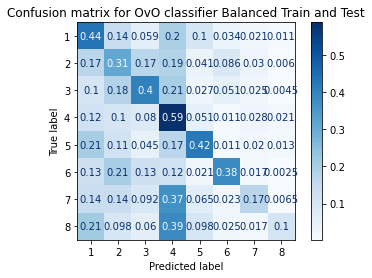

In [37]:
#Balanced
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix = plot_confusion_matrix(classifier_ovo_balanced, test_vectors_ovo_balanced, balanced_df_test['sentiment'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvO classifier Balanced Train and Test')
plt.show(matrix)
plt.show()

Balanced Train and Unbalanced Test

In [22]:
#Balanced Train and Unbalanced Test
for i,s in enumerate(unbalanced['sentiment']):
    if s == 'happy':
        unbalanced.loc[i,'sentiment'] = '1'
    if s == 'fear':
        unbalanced.loc[i,'sentiment'] = '2'
    if s == 'sadness':
        unbalanced.loc[i,'sentiment'] = '3'
    if s == 'neutral':
        unbalanced.loc[i,'sentiment'] = '4'
    if s == 'love':
        unbalanced.loc[i,'sentiment'] = '5'
    if s == 'anger':
        unbalanced.loc[i,'sentiment'] = '6'
    if s == 'surprise':
        unbalanced.loc[i,'sentiment'] = '7'
    if s == 'relief':
        unbalanced.loc[i,'sentiment'] = '8'
        

from sklearn.preprocessing import StandardScaler

unbalanced_train, unbalanced_test = train_test_split(unbalanced, test_size=0.2, random_state=42)

vectorizer_btrainuntest = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors_ovo_btrainuntest = vectorizer_btrainuntest.fit_transform(balanced_df_train['Text'])
test_vectors_ovo_btrainuntest = vectorizer_btrainuntest.transform(unbalanced_test['Text'])

classifier_ovo_btrainuntest = svm.SVC(decision_function_shape='ovo')
t0 = time.time()
classifier_ovo_btrainuntest.fit(train_vectors_ovo_btrainuntest, balanced_df_train['sentiment'])
t1 = time.time()
#svm.SVC(decision_function_shape='ovo')
prediction_ovo_btrainuntest = classifier_ovo_btrainuntest.predict(test_vectors_ovo_btrainuntest)
t2 = time.time()
time_ovo_train = t1-t0
time_ovo_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_ovo_train, time_ovo_predict))
report = classification_report(unbalanced_test['sentiment'], prediction_ovo_btrainuntest, output_dict=True)
print('happy: ', report['1'])
print('fear: ', report['2'])
print('sadness: ', report['3'])
print('neutral: ', report['4'])
print('love: ', report['5'])
print('anger: ', report['6'])
print('surprise: ', report['7'])
print('relief: ', report['8'])

Training time: 1036.578969s; Prediction time: 52.932603s
happy:  {'precision': 0.45913936044216347, 'recall': 0.4226017441860465, 'f1-score': 0.44011352885525074, 'support': 2752}
fear:  {'precision': 0.4406852248394004, 'recall': 0.3146788990825688, 'f1-score': 0.36717216770740413, 'support': 3270}
sadness:  {'precision': 0.41372141372141374, 'recall': 0.40883410374935797, 'f1-score': 0.41126323947300436, 'support': 1947}
neutral:  {'precision': 0.31979855209316965, 'recall': 0.5779294653014789, 'f1-score': 0.4117527862208713, 'support': 1758}
love:  {'precision': 0.41609421000981356, 'recall': 0.43983402489626555, 'f1-score': 0.42763489662128096, 'support': 964}
anger:  {'precision': 0.3872611464968153, 'recall': 0.386277001270648, 'f1-score': 0.38676844783715014, 'support': 787}
surprise:  {'precision': 0.20680628272251309, 'recall': 0.15612648221343872, 'f1-score': 0.17792792792792791, 'support': 506}
relief:  {'precision': 0.24087591240875914, 'recall': 0.10714285714285714, 'f1-sc

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Balanced training model tested on UnBalanced train data:')
print('Accuracy score: {}'.format(accuracy_score(unbalanced_test['sentiment'], prediction_ovo_btrainuntest)))
print('precision score: {}'.format(precision_score(unbalanced_test['sentiment'], prediction_ovo_btrainuntest, average='macro')))
print('recall score: {}'.format(recall_score(unbalanced_test['sentiment'], prediction_ovo_btrainuntest,average='macro')))
print('f1 score: {}'.format(f1_score(unbalanced_test['sentiment'], prediction_ovo_btrainuntest,average='macro')))
print()

Balanced training model tested on UnBalanced train data:
Accuracy score: 0.3940774487471526
precision score: 0.36054776284175605
recall score: 0.35167807223033276
f1 score: 0.34636845017305784



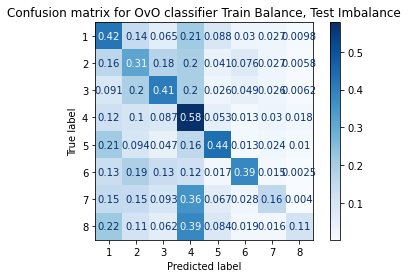

In [23]:
#Balanced Train and Unbalanced Test
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix = plot_confusion_matrix(classifier_ovo_btrainuntest, test_vectors_ovo_btrainuntest, unbalanced_test['sentiment'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvO classifier Train Balance, Test Imbalance')
plt.show(matrix)
plt.show()

Unbalanced Train and Balanced Test

In [24]:
#Imbalance Train and Balanced Test
vectorizer_untrainbtest = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors_ovo_untrainbtest = vectorizer_untrainbtest.fit_transform(unbalanced_train['Text'])
test_vectors_ovo_untrainbtest = vectorizer_untrainbtest.transform(balanced_df_test['Text'])

classifier_ovo_untrainbtest = svm.SVC(decision_function_shape='ovo')
t0 = time.time()
classifier_ovo_untrainbtest.fit(train_vectors_ovo_untrainbtest, unbalanced_train['sentiment'])
t1 = time.time()
#svm.SVC(decision_function_shape='ovo')
prediction_ovo_untrainbtest = classifier_ovo_untrainbtest.predict(test_vectors_ovo_untrainbtest)
t2 = time.time()
time_ovo_train = t1-t0
time_ovo_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_ovo_train, time_ovo_predict))
report = classification_report(balanced_df_test['sentiment'], prediction_ovo_untrainbtest, output_dict=True)
print('happy: ', report['1'])
print('fear: ', report['2'])
print('sadness: ', report['3'])
print('neutral: ', report['4'])
print('love: ', report['5'])
print('anger: ', report['6'])
print('surprise: ', report['7'])
print('relief: ', report['8'])

Training time: 769.573903s; Prediction time: 62.229713s
happy:  {'precision': 0.2593137254901961, 'recall': 0.529, 'f1-score': 0.3480263157894737, 'support': 2000}
fear:  {'precision': 0.19681232091690545, 'recall': 0.5495, 'f1-score': 0.28982067510548526, 'support': 2000}
sadness:  {'precision': 0.4567116759332804, 'recall': 0.2875, 'f1-score': 0.35286897821417607, 'support': 2000}
neutral:  {'precision': 0.2766809728183119, 'recall': 0.4835, 'f1-score': 0.3519563239308462, 'support': 2000}
love:  {'precision': 0.6051332675222113, 'recall': 0.3065, 'f1-score': 0.4069034185197478, 'support': 2000}
anger:  {'precision': 0.7705263157894737, 'recall': 0.183, 'f1-score': 0.2957575757575758, 'support': 2000}
surprise:  {'precision': 0.7241379310344828, 'recall': 0.021, 'f1-score': 0.04081632653061225, 'support': 2000}
relief:  {'precision': 0.6944444444444444, 'recall': 0.0125, 'f1-score': 0.024557956777996073, 'support': 2000}


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Unbalanced training model tested on Balanced test data:')
print('Accuracy score: {}'.format(accuracy_score(balanced_df_test['sentiment'], prediction_ovo_untrainbtest)))
print('precision score: {}'.format(precision_score(balanced_df_test['sentiment'], prediction_ovo_untrainbtest, average='macro')))
print('recall score: {}'.format(recall_score(balanced_df_test['sentiment'], prediction_ovo_untrainbtest,average='macro')))
print('f1 score: {}'.format(f1_score(balanced_df_test['sentiment'], prediction_ovo_untrainbtest,average='macro')))
print()

Unbalanced training model tested on Balanced test data:
Accuracy score: 0.2965625
precision score: 0.49797008174366325
recall score: 0.2965625
f1 score: 0.2638384463282391



{'1': {'precision': 0.2593137254901961, 'recall': 0.529, 'f1-score': 0.3480263157894737, 'support': 2000}, '2': {'precision': 0.19681232091690545, 'recall': 0.5495, 'f1-score': 0.28982067510548526, 'support': 2000}, '3': {'precision': 0.4567116759332804, 'recall': 0.2875, 'f1-score': 0.35286897821417607, 'support': 2000}, '4': {'precision': 0.2766809728183119, 'recall': 0.4835, 'f1-score': 0.3519563239308462, 'support': 2000}, '5': {'precision': 0.6051332675222113, 'recall': 0.3065, 'f1-score': 0.4069034185197478, 'support': 2000}, '6': {'precision': 0.7705263157894737, 'recall': 0.183, 'f1-score': 0.2957575757575758, 'support': 2000}, '7': {'precision': 0.7241379310344828, 'recall': 0.021, 'f1-score': 0.04081632653061225, 'support': 2000}, '8': {'precision': 0.6944444444444444, 'recall': 0.0125, 'f1-score': 0.024557956777996073, 'support': 2000}, 'accuracy': 0.2965625, 'macro avg': {'precision': 0.49797008174366325, 'recall': 0.2965625, 'f1-score': 0.2638384463282391, 'support': 16000

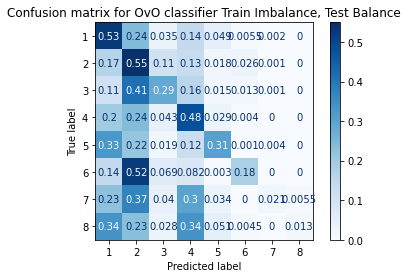

In [38]:
#Imbalance Train and Balanced Test

report = classification_report(balanced_df_test['sentiment'], prediction_ovo_untrainbtest, output_dict=True)
print(report)

from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix = plot_confusion_matrix(classifier_ovo_untrainbtest, test_vectors_ovo_untrainbtest, balanced_df_test['sentiment'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvO classifier Train Imbalance, Test Balance')
plt.show(matrix)
plt.show()

## Testing on Real World Dataset

In [26]:
realWorldTest = pd.read_csv('realWorldEmotions.csv')
realWorldTest['Text'] = realWorldTest['Text'].apply(lambda x: re.sub("(@[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)",'',x))
realWorldTest.dropna(inplace=True)

realWorldTest['Text'] = realWorldTest['Text'].apply(lambda x: replace(x))
realWorldTest['Sentiment'] = np.where((realWorldTest.Sentiment == 'joy'),'happy', realWorldTest.Sentiment)
realWorldTest['Sentiment'].value_counts()

for i,s in enumerate(realWorldTest['Sentiment']):
    if s == 'happy':
        realWorldTest.loc[i,'Sentiment'] = '1'
    if s == 'fear':
        realWorldTest.loc[i,'Sentiment'] = '2'
    if s == 'sadness':
        realWorldTest.loc[i,'Sentiment'] = '3'
    if s == 'neutral':
        realWorldTest.loc[i,'Sentiment'] = '4'
    if s == 'love':
        realWorldTest.loc[i,'Sentiment'] = '5'
    if s == 'anger':
        realWorldTest.loc[i,'Sentiment'] = '6'
    if s == 'surprise':
        realWorldTest.loc[i,'Sentiment'] = '7'
    if s == 'relief':
        realWorldTest.loc[i,'Sentiment'] = '8'
        


In [35]:
realWorldTest['Sentiment'].value_counts()

1    695
3    581
6    275
2    224
5    159
7     66
Name: Sentiment, dtype: int64

In [34]:
realWorldTest.count()

Text         2000
Sentiment    2000
dtype: int64

In [33]:
#Balanced

test_vectors_real_balanced = vectorizer_balanced.transform(realWorldTest['Text'])
prediction_ovotest_vectors_real_balanced = classifier_ovo_balanced.predict(test_vectors_real_balanced)
report = classification_report(realWorldTest['Sentiment'], prediction_ovotest_vectors_real_balanced, output_dict=True)



print('happy: ', report['1'])
print('fear: ', report['2'])
print('sadness: ', report['3'])
print('love: ', report['5'])
print('surprise: ', report['7'])
print('anger: ', report['6'])


happy:  {'precision': 0.8383838383838383, 'recall': 0.4776978417266187, 'f1-score': 0.608615948670944, 'support': 695}
fear:  {'precision': 0.2615803814713896, 'recall': 0.8571428571428571, 'f1-score': 0.4008350730688935, 'support': 224}
sadness:  {'precision': 0.7840172786177105, 'recall': 0.6247848537005164, 'f1-score': 0.6954022988505747, 'support': 581}
love:  {'precision': 0.6435643564356436, 'recall': 0.4088050314465409, 'f1-score': 0.5, 'support': 159}
surprise:  {'precision': 0.75, 'recall': 0.5, 'f1-score': 0.6, 'support': 66}
anger:  {'precision': 0.6398305084745762, 'recall': 0.5490909090909091, 'f1-score': 0.5909980430528374, 'support': 275}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
prediction_ovotest_vectors_real_balanced 

array(['3', '3', '2', ..., '2', '1', '2'], dtype=object)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Balanced training model tested on unseen data:')
print('Accuracy score: {}'.format(accuracy_score(realWorldTest['Sentiment'], prediction_ovotest_vectors_real_balanced)))
print('precision score: {}'.format(precision_score(realWorldTest['Sentiment'], prediction_ovotest_vectors_real_balanced, average='macro')))
print('recall score: {}'.format(recall_score(realWorldTest['Sentiment'], prediction_ovotest_vectors_real_balanced,average='macro')))
print('f1 score: {}'.format(f1_score(realWorldTest['Sentiment'], prediction_ovotest_vectors_real_balanced,average='macro')))
print()


Balanced training model tested on unseen data:
Accuracy score: 0.568
precision score: 0.5596251947690226
recall score: 0.4882173561582061
f1 score: 0.4851216233776071



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#Unbalanced

test_vectors_real_untrainuntest = vectorizer_untrainuntest.transform(realWorldTest['Text'])
prediction_ovotest_vectors_real_unbalanced = classifier_ovo_untrainuntest.predict(test_vectors_real_untrainuntest)
report = classification_report(realWorldTest['Sentiment'], prediction_ovotest_vectors_real_unbalanced, output_dict=True)

print('happy: ', report['1'])
print('fear: ', report['2'])
print('sadness: ', report['3'])
print('love: ', report['5'])
print('surprise: ', report['7'])
print('anger: ', report['6'])

happy:  {'precision': 0.8251121076233184, 'recall': 0.5294964028776978, 'f1-score': 0.6450482033304119, 'support': 695}
fear:  {'precision': 0.183206106870229, 'recall': 0.9642857142857143, 'f1-score': 0.30791161796151106, 'support': 224}
sadness:  {'precision': 0.9534883720930233, 'recall': 0.423407917383821, 'f1-score': 0.5864123957091776, 'support': 581}
love:  {'precision': 0.7714285714285715, 'recall': 0.16981132075471697, 'f1-score': 0.2783505154639175, 'support': 159}
surprise:  {'precision': 0.75, 'recall': 0.045454545454545456, 'f1-score': 0.08571428571428572, 'support': 66}
anger:  {'precision': 0.8823529411764706, 'recall': 0.21818181818181817, 'f1-score': 0.3498542274052478, 'support': 275}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Unbalanced training model tested on unseen data:')
print('Accuracy score: {}'.format(accuracy_score(realWorldTest['Sentiment'], prediction_ovotest_vectors_real_unbalanced)))
print('precision score: {}'.format(precision_score(realWorldTest['Sentiment'], prediction_ovotest_vectors_real_unbalanced, average='macro')))
print('recall score: {}'.format(recall_score(realWorldTest['Sentiment'], prediction_ovotest_vectors_real_unbalanced,average='macro')))
print('f1 score: {}'.format(f1_score(realWorldTest['Sentiment'], prediction_ovotest_vectors_real_unbalanced,average='macro')))
print()

Unbalanced training model tested on unseen data:
Accuracy score: 0.46
precision score: 0.6236554427416588
recall score: 0.33580538841975915
f1 score: 0.3218987493692217



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
